In [96]:
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from tensorflow.keras.layers import Conv2D,MaxPooling2D
import os

In [97]:
num_classes=5
img_rows,img_cols=48,48
batch_size=32

In [98]:
train_data_dir = r'C:/Users/jordan/Desktop/emot/train'
validation_data_dir = r'C:/Users/jordan/Desktop/emot/validation'

In [99]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.3,
    width_shift_range=0.4,
    height_shift_range=0.4,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

In [100]:
train_generator = train_datagen.flow_from_directory(
                        train_data_dir,
                        color_mode='grayscale',
                        target_size=(img_rows,img_cols),
                        batch_size=batch_size,
                        class_mode='categorical',
                        shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
                                validation_data_dir,
                                color_mode='grayscale',
                                target_size=(img_rows,img_cols),
                                batch_size=batch_size,
                                class_mode='categorical',
                                shuffle=True)

Found 24256 images belonging to 5 classes.
Found 3006 images belonging to 5 classes.


In [101]:
model = Sequential()

In [102]:
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

In [103]:
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

In [104]:
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

In [105]:
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

In [106]:
model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

In [107]:
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

In [108]:
model.add(Dense(num_classes,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

In [109]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_11 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_12 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 32)       

In [113]:
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [114]:
checkpoint = ModelCheckpoint('EmotionDetectionModel.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks = [earlystop,checkpoint,reduce_lr]

opt = tensorflow.keras.optimizers.Adam(lr=0.001)

In [115]:
model.compile(loss='categorical_crossentropy',
              optimizer = opt,
              metrics=['accuracy'])

In [136]:
nb_train_samples = 24176
nb_validation_samples = 3006
epochs=50

In [137]:
history=model.fit(
                train_generator,
                steps_per_epoch=nb_train_samples//batch_size,
                epochs=epochs,
                callbacks=callbacks,
                validation_data=validation_generator,
                validation_steps=nb_validation_samples//batch_size)

Epoch 1/50
755/755 [==============================] - 15s 19ms/step - loss: 1.0380 - accuracy: 0.5920 - val_loss: 1.2033 - val_accuracy: 0.6072

Epoch 00001: val_loss did not improve from 1.18936
Epoch 2/50
755/755 [==============================] - 15s 19ms/step - loss: 1.0153 - accuracy: 0.6046 - val_loss: 1.1810 - val_accuracy: 0.6106

Epoch 00002: val_loss improved from 1.18936 to 1.18097, saving model to EmotionDetectionModel.h5
Epoch 3/50
755/755 [==============================] - 15s 19ms/step - loss: 1.0084 - accuracy: 0.6061 - val_loss: 1.2014 - val_accuracy: 0.6176

Epoch 00003: val_loss did not improve from 1.18097
Epoch 4/50
755/755 [==============================] - 15s 19ms/step - loss: 1.0026 - accuracy: 0.6074 - val_loss: 1.1978 - val_accuracy: 0.6065

Epoch 00004: val_loss did not improve from 1.18097
Epoch 5/50
755/755 [==============================] - 15s 19ms/step - loss: 1.0002 - accuracy: 0.6129 - val_loss: 1.1896 - val_accuracy: 0.6025
Restoring model weights fr

In [138]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Happy


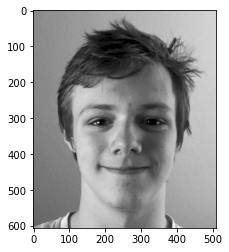

In [152]:
img = cv2.imread(r'C:\Users\jordan\Desktop\jordan.png',0)
plt.imshow(img, cmap="gray")
img = cv2.resize(img, (48,48))
img = np.reshape(img,[1,48,48,1])
img_pixels = img.astype("float32") / 255.0
classes = model.predict_classes(img_pixels)

mapper=['Angry','Happy', 'Neutral', 'Sad', 'Suprised']
print(mapper[classes[0]])

Angry


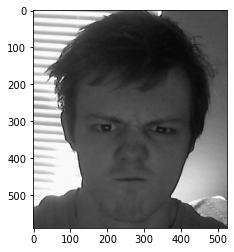

In [153]:
img = cv2.imread(r'C:\Users\jordan\Desktop\jordanMad.png',0)
plt.imshow(img, cmap="gray")
img = cv2.resize(img, (48,48))
img = np.reshape(img,[1,48,48,1])
img_pixels = img.astype("float32") / 255.0
classes = model.predict_classes(img_pixels)

mapper=['Angry','Suprised', 'Neutral', 'Sad', 'Happy']
print(mapper[classes[0]])

Neutral


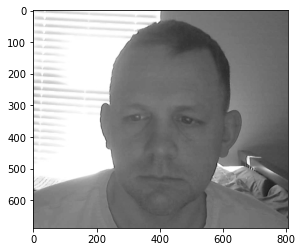

In [154]:
img = cv2.imread(r'C:\Users\jordan\Desktop\dad.jpg',0)
plt.imshow(img, cmap="gray")
img = cv2.resize(img, (48,48))
img = np.reshape(img,[1,48,48,1])
img_pixels = img.astype("float32") / 255.0
classes = model.predict_classes(img_pixels)

mapper=['Angry','Suprised', 'Neutral', 'Sad', 'Happy']
print(mapper[classes[0]])

Sad


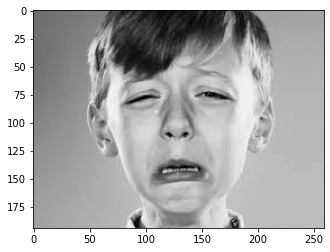

In [155]:
img = cv2.imread(r'C:\Users\jordan\Desktop\sad.jpg',0)
plt.imshow(img, cmap="gray")
img = cv2.resize(img, (48,48))
img = np.reshape(img,[1,48,48,1])
img_pixels = img.astype("float32") / 255.0
classes = model.predict_classes(img_pixels)

mapper=['Angry','Suprised', 'Neutral', 'Sad', 'Happy']
print(mapper[classes[0]])

Suprised


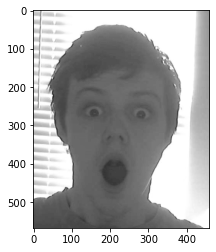

In [160]:
img = cv2.imread(r'C:\Users\jordan\Desktop\jordanSuprise.jpg',0)
plt.imshow(img, cmap="gray")
img = cv2.resize(img, (48,48))
img = np.reshape(img,[1,48,48,1])
img_pixels = img.astype("float32") / 255.0
classes = model.predict_classes(img_pixels)

mapper=['Angry','Suprised', 'Neutral', 'Sad', 'Happy']
print(mapper[classes[0]])

Angry


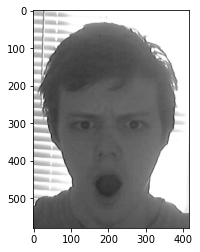

In [159]:
img = cv2.imread(r'C:\Users\jordan\Desktop\jordanSup.jpg',0)
plt.imshow(img, cmap="gray")
img = cv2.resize(img, (48,48))
img = np.reshape(img,[1,48,48,1])
img_pixels = img.astype("float32") / 255.0
classes = model.predict_classes(img_pixels)

mapper=['Angry','Suprised', 'Neutral', 'Sad', 'Happy']
print(mapper[classes[0]])

In [ ]:
# Pretty Neat!